In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter

# Exploratory analysis

- import train csv
- exploratory analysis
    - check imbalanced classes
    - change categorical to numeric classes (admission mode)
    - check correlations


In [2]:
train_set = pd.read_csv("../database/students-dropout/train.csv")
test_set = pd.read_csv('../database/students-dropout/test.csv')
validation_set = pd.read_csv('../database/students-dropout/validation.csv')

In [3]:
train_set.shape

(2476, 36)

In [4]:
train_set.columns

Index(['Id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Nacionality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evalua

In [5]:
train_set.head()

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
0,3222,1,1,1,14,1,1,1,13,28,...,0,6,7,6,14.714286,0,11.1,0.6,2.02,Graduate
1,2388,1,8,4,9,1,1,1,23,14,...,0,5,10,2,12.500000,0,11.1,0.6,2.02,Dropout
2,1865,1,12,1,17,0,1,1,1,1,...,0,5,5,5,12.400000,0,15.5,2.8,-4.06,Graduate
3,652,1,12,1,12,1,12,1,1,5,...,0,8,11,7,12.614286,0,12.7,3.7,-1.70,Graduate
4,4220,1,1,1,14,1,1,1,19,28,...,0,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout


<AxesSubplot: >

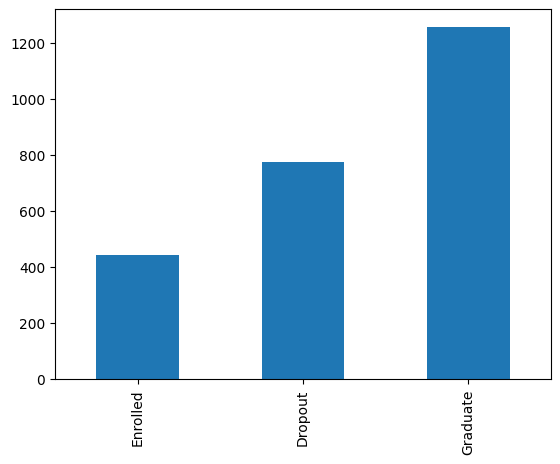

In [3]:
train_set['Category'].value_counts()
train_set.Category.value_counts().sort_values().plot(kind = 'bar')

In [4]:
one_hot_encoded_target = pd.get_dummies(train_set, columns = ['Category'])
one_hot_encoded_target.head()

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category_Dropout,Category_Enrolled,Category_Graduate
0,3222,1,1,1,14,1,1,1,13,28,...,7,6,14.714286,0,11.1,0.6,2.02,0,0,1
1,2388,1,8,4,9,1,1,1,23,14,...,10,2,12.500000,0,11.1,0.6,2.02,1,0,0
2,1865,1,12,1,17,0,1,1,1,1,...,5,5,12.400000,0,15.5,2.8,-4.06,0,0,1
3,652,1,12,1,12,1,12,1,1,5,...,11,7,12.614286,0,12.7,3.7,-1.70,0,0,1
4,4220,1,1,1,14,1,1,1,19,28,...,5,0,0.000000,0,9.4,-0.8,-3.12,1,0,0


In [5]:
train_set['Marital status'].value_counts()

1    2201
2     201
4      57
5      14
3       2
6       1
Name: Marital status, dtype: int64

In [6]:
one_hot_encoded_target["Marital status"] = np.where(one_hot_encoded_target["Marital status"] == 1, 1, 0)
one_hot_encoded_target['Marital status']

0       1
1       1
2       1
3       1
4       1
       ..
2471    1
2472    1
2473    0
2474    1
2475    1
Name: Marital status, Length: 2476, dtype: int64

Text(0.5, 1.0, 'Correlation heatmap')

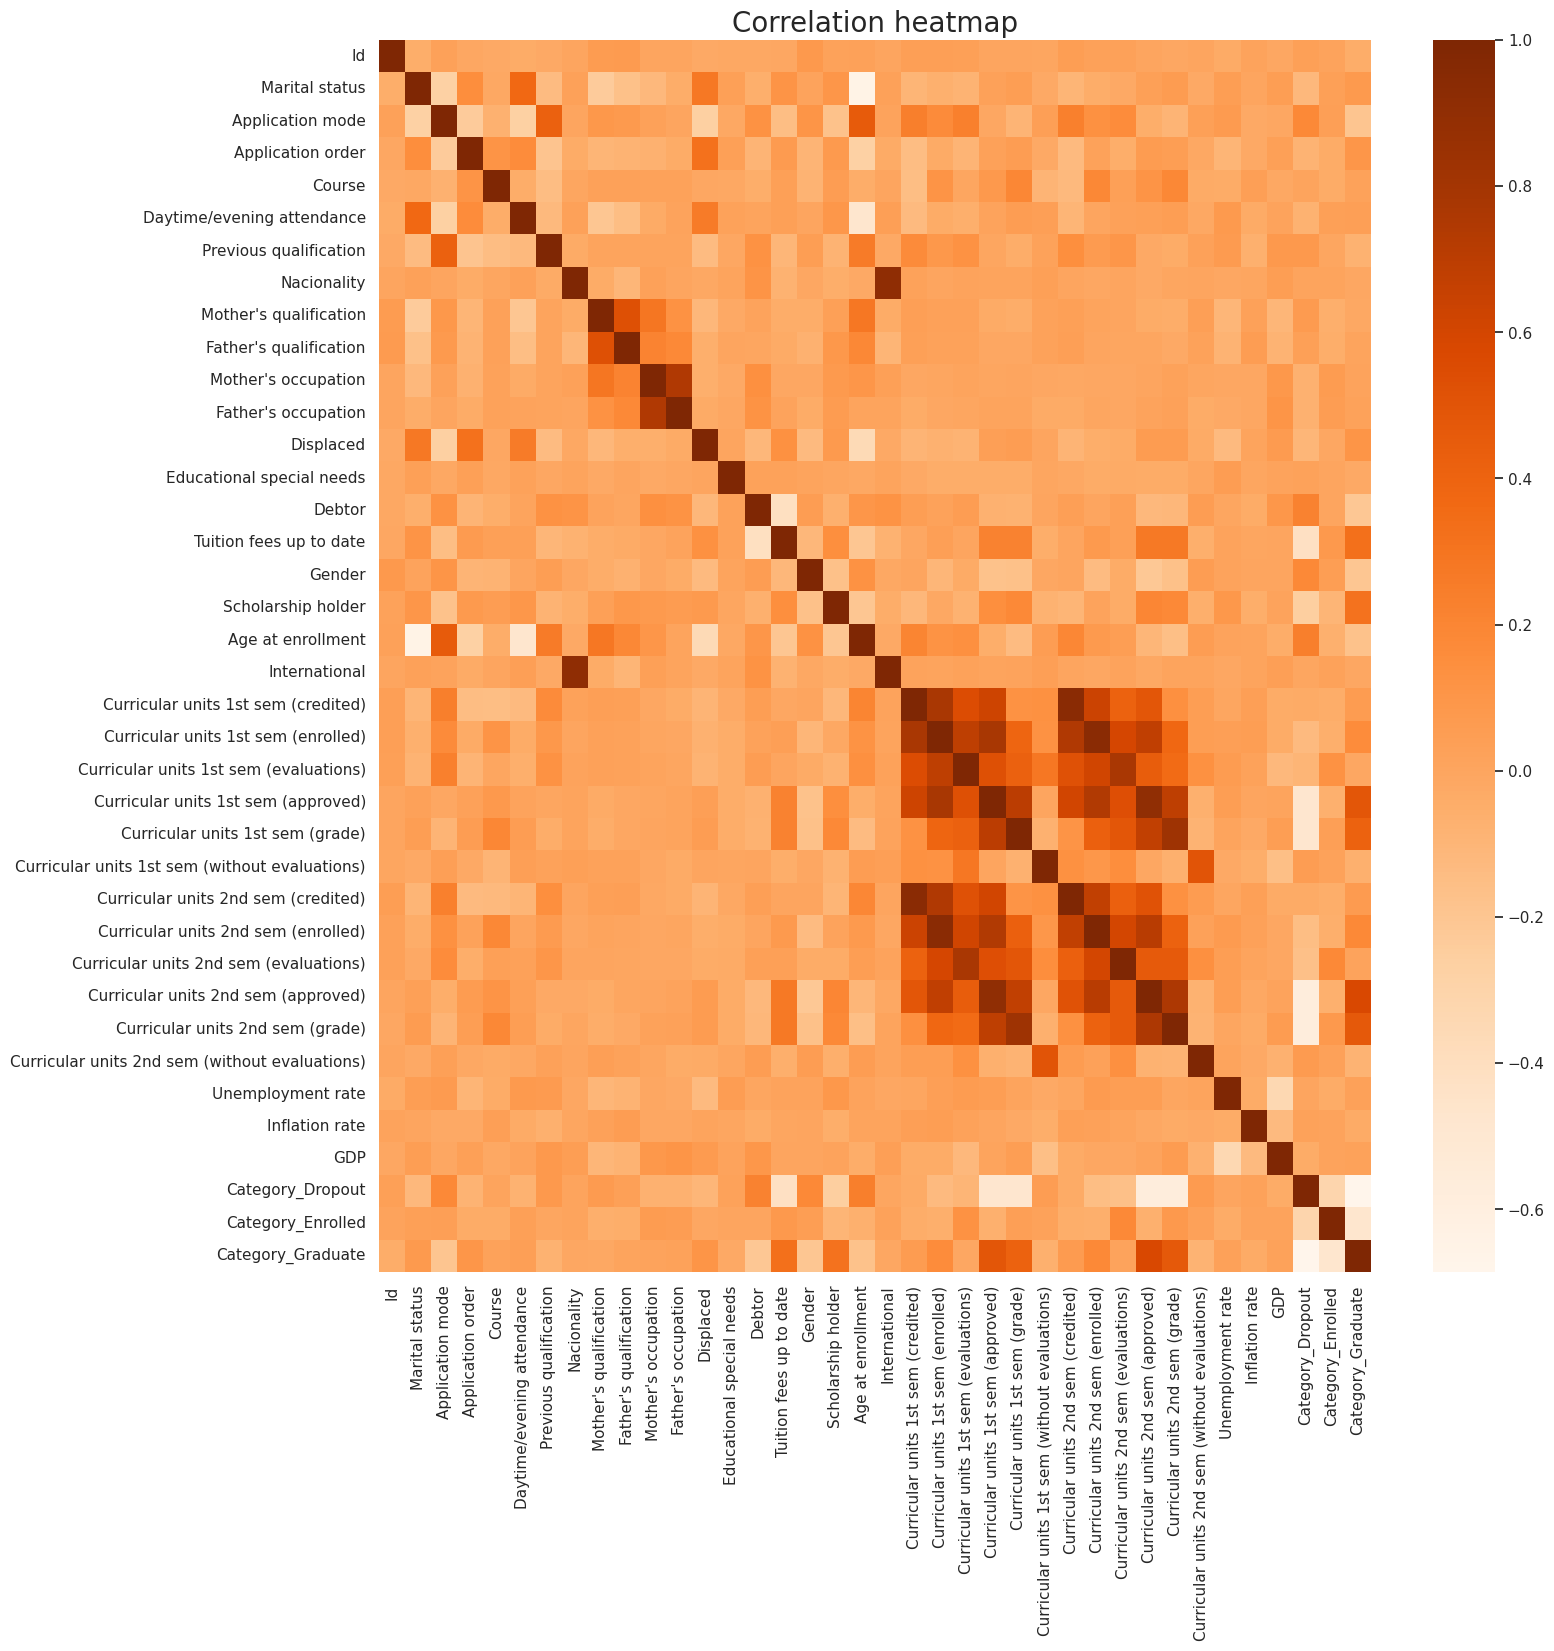

In [7]:
sns.set(rc={'figure.figsize':(16,16)})

heatmap = sns.heatmap(one_hot_encoded_target.corr(), cmap="Oranges")
heatmap.axes.set_title("Correlation heatmap", fontsize=20)

----

# Feature engineering

In [4]:
train_set[train_set.duplicated()]

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category


### Modifying "Application mode" to 1 if "1st phase", else 0

In [8]:
train_set["Marital status"] = np.where(train_set["Marital status"] == 1, 1, 0)
validation_set["Marital status"] = np.where(validation_set["Marital status"] == 1, 1, 0)
test_set["Marital status"] = np.where(test_set["Marital status"] == 1, 1, 0)

In [9]:
clean_train_set = train_set[['Marital status', 'Application order', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'Displaced', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]
clean_train_set.head()

,Marital status,Application order,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Displaced,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,1,1,0,1,0,1,20,1,0,6,8,6,15.250000,0,0,6,7,6,14.714286,0
1,1,4,0,1,1,1,18,1,0,5,8,4,10.800000,0,0,5,10,2,12.500000,0
2,1,1,0,1,1,0,26,0,0,5,5,5,12.400000,0,0,5,5,5,12.400000,0
3,1,1,0,1,0,0,24,0,0,8,11,7,12.614286,0,0,8,11,7,12.614286,0
4,1,1,0,1,0,0,22,0,0,5,6,2,12.500000,0,0,5,5,0,0.000000,0


In [10]:
clean_validation_set = validation_set[['Marital status', 'Application order', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'Displaced', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]
clean_validation_set.head()

,Marital status,Application order,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Displaced,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,0,1,0,1,0,1,30,1,0,6,7,0,0.000000,0,0,6,16,1,10.000000,0
1,1,1,0,1,0,0,18,0,0,6,9,5,11.571429,0,0,6,8,6,12.142857,0
2,1,1,1,1,0,1,18,0,0,7,7,7,12.714286,0,0,7,7,7,12.285714,0
3,1,2,0,1,1,0,19,1,0,6,8,6,13.857143,0,0,6,8,5,13.000000,0
4,1,1,0,1,0,0,27,1,0,7,14,0,0.000000,0,0,7,14,0,0.000000,0


In [11]:
clean_test_set = test_set[['Marital status', 'Application order', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'Displaced', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]
clean_test_set.head()

,Marital status,Application order,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Displaced,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,1,1,0,0,1,0,25,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0
1,1,1,0,1,0,1,18,1,0,5,8,4,10.750000,0,0,5,5,5,13.000000,0
2,1,2,0,1,0,1,20,1,0,7,10,5,12.620000,0,0,7,8,6,12.500000,0
3,0,2,0,1,0,0,47,0,0,5,0,0,0.000000,0,0,5,0,0,0.000000,0
4,1,2,0,1,0,0,21,1,0,6,7,6,13.428571,0,0,6,8,6,13.142857,0


----

# Oversampling

In [12]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(clean_train_set, train_set['Category'])
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{'Dropout': 1258, 'Enrolled': 1258, 'Graduate': 1258}

----

# Model trainig and prediction

### Multinomial Logistic Regression

In [9]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

#X = clean_train_set
#y = train_set['Category']

# fit the model on the whole dataset
model.fit(X, y)

/home/tania/becode/student-dropout-challenge/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [10]:
model.score(X, y)

0.7400635930047694

In [11]:
# predict the class label on the validation set
prediction = model.predict(clean_validation_set)

In [12]:
unique, counts = np.unique(prediction, return_counts=True)
dict(zip(unique, counts))

{'Dropout': 398, 'Enrolled': 286, 'Graduate': 644}

In [13]:
confusion = confusion_matrix(validation_set['Category'], prediction)
confusion

array([[330,  70,  41],
       [ 50, 124,  71],
       [ 18,  92, 532]])

In [14]:
print(classification_report(validation_set['Category'], prediction, target_names=['Dropout', 'Enrolled', 'Graduate']))

              precision    recall  f1-score   support

     Dropout       0.83      0.75      0.79       441
    Enrolled       0.43      0.51      0.47       245
    Graduate       0.83      0.83      0.83       642

    accuracy                           0.74      1328
   macro avg       0.70      0.69      0.69      1328
weighted avg       0.75      0.74      0.75      1328



### SVM

- linear SVM

In [14]:
# define the linear svm model
model = SVC(kernel='linear', C=1, decision_function_shape='ovo')

In [15]:
# fit the model on the dataset
model.fit(X, y)
model.score(X, y)

0.750132485426603

In [16]:
# predict the class label on the validation set
prediction = model.predict(clean_validation_set)
unique, counts = np.unique(prediction, return_counts=True)
dict(zip(unique, counts))

{'Dropout': 357, 'Enrolled': 338, 'Graduate': 633}

In [17]:
confusion = confusion_matrix(validation_set['Category'], prediction)
confusion

array([[305,  94,  42],
       [ 37, 141,  67],
       [ 15, 103, 524]])

In [18]:
print(classification_report(validation_set['Category'], prediction, target_names=['Dropout', 'Enrolled', 'Graduate']))

              precision    recall  f1-score   support

     Dropout       0.85      0.69      0.76       441
    Enrolled       0.42      0.58      0.48       245
    Graduate       0.83      0.82      0.82       642

    accuracy                           0.73      1328
   macro avg       0.70      0.69      0.69      1328
weighted avg       0.76      0.73      0.74      1328



- Radial Basis Function (RBF) SVM

In [14]:
# define the RBF svm model
model = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')

In [15]:
# fit the model on the dataset
model.fit(X, y)
model.score(X, y)

0.990990990990991

In [16]:
# predict the class label on the validation set
prediction = model.predict(clean_validation_set)
unique, counts = np.unique(prediction, return_counts=True)
dict(zip(unique, counts))

{'Dropout': 189, 'Enrolled': 50, 'Graduate': 1089}

In [17]:
print(classification_report(validation_set['Category'], prediction, target_names=['Dropout', 'Enrolled', 'Graduate']))

              precision    recall  f1-score   support

     Dropout       0.76      0.32      0.45       441
    Enrolled       0.32      0.07      0.11       245
    Graduate       0.55      0.93      0.69       642

    accuracy                           0.57      1328
   macro avg       0.54      0.44      0.42      1328
weighted avg       0.58      0.57      0.51      1328



### Random Forest

In [13]:
# define the Random Forest model
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 3)


In [14]:
# fit the model on the dataset
model.fit(X, y)
model.score(X, y)

0.9920508744038156

In [15]:
# predict the class label on the validation set
prediction = model.predict(clean_validation_set)
unique, counts = np.unique(prediction, return_counts=True)
dict(zip(unique, counts))

{'Dropout': 402, 'Enrolled': 272, 'Graduate': 654}

In [16]:
print(classification_report(validation_set['Category'], prediction, target_names=['Dropout', 'Enrolled', 'Graduate']))

              precision    recall  f1-score   support

     Dropout       0.83      0.76      0.79       441
    Enrolled       0.47      0.52      0.49       245
    Graduate       0.83      0.85      0.84       642

    accuracy                           0.76      1328
   macro avg       0.71      0.71      0.71      1328
weighted avg       0.76      0.76      0.76      1328



----

# Saving the results to csv

In [17]:
# predict final classification on the test set
prediction = model.predict(clean_test_set)

In [18]:
df = pd.DataFrame({'Category': prediction})
df.head()

,Category
0,Dropout
1,Graduate
2,Enrolled
3,Dropout
4,Graduate


In [19]:
test_set_id = test_set[['Id']]
test_set_id.head()

,Id
0,3557
1,1980
2,1112
3,2914
4,2745


In [20]:
final_df = pd.merge(test_set_id, df, how='left', left_index=True, right_index=True)
final_df

,Id,Category
0,3557,Dropout
1,1980,Graduate
2,1112,Enrolled
3,2914,Dropout
4,2745,Graduate
...,...,...
615,335,Graduate
616,1639,Graduate
617,1381,Dropout
618,2455,Graduate


In [21]:
final_df.to_csv('prediction.csv', index=False)

---

# Results bechmark
- multinomial logistic regession, features 'Age' and 'Scholarship'. Score : 0.5642
- multinomial logistic regession, features 'Age' and 'Scholarship'. SMOTE. Score : 0.4888
- multinomial logistic regession, features 'Age', 'Scholarship', 'Tuition fees' . SMOTE. 0.5188
